# 附录A：关于布莱克-斯科尔斯-默顿模型的一些有用的推导式

BSM价格表达式如下:
$$C(S,K,\tau,\sigma,r)=SN(d_1)-Ke^{-r\tau}N(d_2)$$

$$d_1=\frac{\ln\left(\frac{S_F}{K}\right)+\frac{\sigma^2}{2}\tau}{\sigma\sqrt{\tau}}$$

$$d_2=\frac{\ln\left(\frac{S_F}{K}\right)-\frac{\sigma^2}{2}\tau}{\sigma\sqrt{\tau}}$$

$$S_F=e^{r\tau}S$$

$$N(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}{e^{-\frac{1}{2}y^2}\mathrm{d}y}$$

## 有用的推导式

$$N^{\prime}(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

$$\frac{\partial C}{\partial\sigma}=\frac{1}{\sqrt{2\pi}}Se^{-\frac{1}{2}d_1^2}\sqrt{\tau}$$

$$KN^{\prime}(d_2)=S_FN^{\prime}(d_1)$$

$$\frac{\partial C}{\partial S}=N(d_1)$$

$$\frac{\partial d_{1,2}}{\partial K}=\frac{-1}{K\sigma\sqrt{\tau}}$$

$$\frac{\partial C}{\partial K}=-e^{-r\tau}N(d_2)$$

$$\frac{\partial d_{1,2}}{\partial\sigma}=\frac{-1}{\sigma^2\sqrt{\tau}}\ln\left(\frac{S_F}{K}\right)\pm\frac{1}{2}\sqrt{\tau}$$

## 证明
###  准备

In [2]:
import sympy as sy
import sympy.stats as systats
sy.init_printing()

In [3]:
S, K, tau, sigma, r = sy.symbols("S K tau sigma r")
def S_F(tau, r, s):
    return sy.exp(tau*r)*s
def d1(S, K, tau, sigma, r):
    return (sy.ln(S_F(tau, r, S) / K) + 1/2 * sigma ** 2 * tau) / (sigma * sy.sqrt(tau))
def d2(S, K, tau, sigma, r):
    return (sy.ln(S_F(tau, r, S) / K) - 1/2 * sigma ** 2 * tau) / (sigma * sy.sqrt(tau))
def N(x):
    y = sy.Symbol('y')
    return 1/sy.sqrt(2*sy.pi)*sy.Integral(sy.exp(-0.5*y**2), (y, -sy.oo , x))
def C(S, K, tau, sigma, r):
    return S*N(d1(S, K, tau, sigma, r))-K*sy.exp(-r*tau)*N(d2(S, K, tau, sigma, r))

### 1. $$N(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}{e^{-\frac{1}{2}y^2}\mathrm{d}y}$$

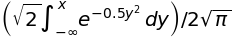

In [4]:
x = sy.Symbol("x")
N(x)

### 2. $$N^{\prime}(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

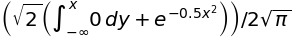

In [5]:
sy.diff(N(x),x)

### 3.  $$KN^{\prime}(d_2)=S_FN^{\prime}(d_1)$$

In [6]:
def Nprime(x):
    return 1/sy.sqrt(2*sy.pi)*sy.exp(-1/2*x**2)
Nprime(x)

In [7]:
K*Nprime(d2(S, K, tau, sigma, r))

In [9]:
S*sy.exp(r*tau)*Nprime(d1(S, K, tau, sigma, r))

$$KN^\prime(d_2)=\frac{K}{\sqrt{2\pi}}e^{-\frac{1}{2}d_2^2}=\frac{K}{\sqrt{2\pi}}e^{-\frac{1}{2}\frac{\left[\ln\left(\frac{S_F}{K}\right)-\frac{\sigma^2}{2}\tau\right]^2}{\sigma^2\tau}}$$

$$S_FN^\prime(d_1)=\frac{S_F}{\sqrt{2\pi}}e^{-\frac{1}{2}d_1^2}=\frac{S_F}{\sqrt{2\pi}}e^{-\frac{1}{2}\frac{\left[\ln\left(\frac{S_F}{K}\right)+\frac{\sigma^2}{2}\tau\right]^2}{\sigma^2\tau}}$$

In [11]:
sy.simplify(K*Nprime(d2(S, K, tau, sigma, r))/(S*sy.exp(r*tau)*Nprime(d1(S, K, tau, sigma, r))))

$$\frac{KN^\prime(d_2)}{S_FN^\prime(d_1)}=\frac{K}{S_F}e^{\frac{1}{2}\frac{2\ln{\left(\frac{S_F}{K}\right)}\sigma^2\tau}{\sigma^2\tau}}=1$$

### 4. $$\frac{\partial d_{1,2}}{\partial\sigma}=\frac{-1}{\sigma^2\sqrt{\tau}}\ln\left(\frac{S_F}{K}\right)\pm\frac{1}{2}\sqrt{\tau}$$

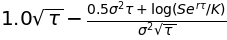

In [12]:
sy.diff(d1(S, K, tau, sigma, r), sigma)

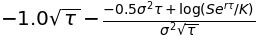

In [13]:
sy.diff(d2(S, K, tau, sigma, r), sigma)

### 5. $$\frac{\partial C}{\partial\sigma}=\frac{1}{\sqrt{2\pi}}Se^{-\frac{1}{2}d_1^2}\sqrt{\tau}$$

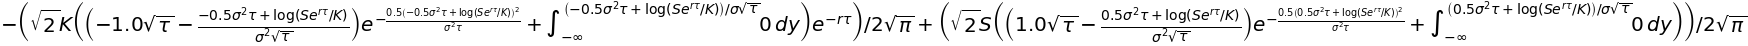

In [72]:
sy.diff(C(S, K, tau, sigma, r), sigma)

$$d_1=\frac{\ln\left(\frac{S_F}{K}\right)+\frac{\sigma^2}{2}\tau}{\sigma\sqrt{\tau}}$$
$$d_2=\frac{\ln\left(\frac{S_F}{K}\right)-\frac{\sigma^2}{2}\tau}{\sigma\sqrt{\tau}}$$

$$\frac{Ke^{-r\tau}\sqrt{\tau}}{\sqrt{2\pi}}(1+\frac{d_2}{\sigma\sqrt{\tau}})e^{-\frac{1}{2}d_2^2}+\frac{S\sqrt{\tau}}{\sqrt{2\pi}}(1-\frac{d_1}{\sigma\sqrt{\tau}})e^{-\frac{1}{2}d_1^2}$$

$$C(S,K,\tau,\sigma,r)=SN(d_1)-Ke^{-r\tau}N(d_2)$$

$$\frac{\partial C(S,K,\tau,\sigma,r)}{\partial\sigma}=SN^\prime(d_1)\frac{\partial d_1}{\partial\sigma}-Ke^{-r\tau}N^\prime(d_2)\frac{\partial d_2}{\partial\sigma}=SN^\prime(d_1)\left(\frac{\partial d_1}{\partial\sigma}-\frac{\partial d_2}{\partial\sigma}\right)$$

$$\frac{\partial d_{1,2}}{\partial\sigma}=\frac{-1}{\sigma^2\sqrt{\tau}}\ln\left(\frac{S_F}{K}\right)\pm\frac{1}{2}\sqrt{\tau}$$

$$\frac{\partial C(S,K,\tau,\sigma,r)}{\partial\sigma}=SN^\prime(d_1)\sqrt{\tau}=\frac{1}{\sqrt{2\pi}}Se^{-\frac{1}{2}d_1^2}\sqrt{\tau}$$

### 6.  $$\frac{\partial d_{1,2}}{\partial K}=\frac{-1}{K\sigma\sqrt{\tau}}$$

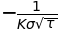

In [14]:
sy.diff(d1(S, K, tau, sigma, r), K)

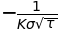

In [16]:
sy.diff(d2(S, K, tau, sigma, r), K)

### 7. $$\frac{\partial C}{\partial S}=N(d_1)$$

$$\frac{\partial C(S,K,\tau,\sigma,r)}{\partial S}=N(d_1)+SN^\prime(d_1)\frac{\partial d_1}{\partial S}-Ke^{-r\tau}N^\prime(d_2)\frac{\partial d_2}{\partial S}=N(d_1)$$

### 8. $$\frac{\partial C}{\partial K}=-e^{-r\tau}N(d_2)$$

$$\frac{\partial C(S,K,\tau,\sigma,r)}{\partial K}=SN^\prime(d_1)\frac{\partial d_1}{\partial K}-Ke^{-r\tau}N^\prime(d_2)\frac{\partial d_2}{\partial K}-e^{-r\tau}N(d_2)=-e^{-r\tau}N(d_2)$$